 ### Importing Libraries

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

2022-03-10 02:36:58.152454: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-03-10 02:36:58.152576: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')

In [43]:
DATA_PATH="../input/my-task/preprocessed_df.csv"

In [44]:
#Reading Dataframe file
df=pd.read_csv(DATA_PATH)

In [45]:
df.head()

,id,texts,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [46]:
df.drop_duplicates(subset=["texts","dialect"],inplace=True)

In [47]:
df=df.dropna()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458191 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458191 non-null  int64 
 1   texts    458191 non-null  object
 2   dialect  458191 non-null  object
dtypes: int64(1), object(2)
memory usage: 14.0+ MB


### EDA

<AxesSubplot:ylabel='dialect'>

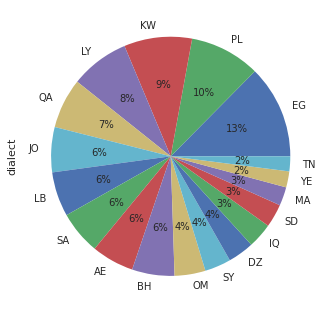

In [49]:
df.dialect.value_counts().plot(kind='pie', autopct='%1.0f%%')

Text(0, 0.5, 'Count')

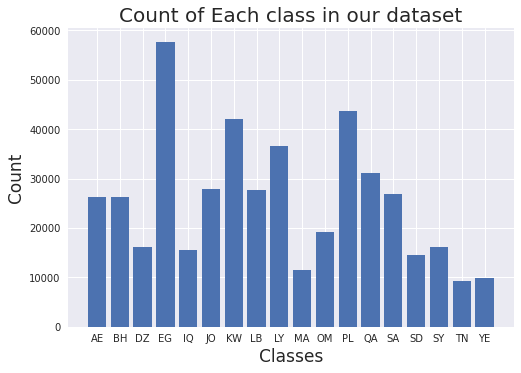

In [50]:
grouped_df = df.groupby(['dialect']).count().reset_index()
plt.style.use("seaborn")
plt.bar(grouped_df["dialect"],grouped_df["texts"])
plt.title("Count of Each class in our dataset",fontdict={"size":20})
plt.xlabel("Classes",fontdict={"size":17})
plt.ylabel("Count",fontdict={"size":17})


In [51]:
grouped_df=grouped_df.drop(columns=["id"]).rename(columns={"texts":"count"})
grouped_df

,dialect,count
0,AE,26296
1,BH,26291
2,DZ,16183
3,EG,57635
4,IQ,15497
5,JO,27921
6,KW,42108
7,LB,27617
8,LY,36499
9,MA,11539


In [52]:
list(set(df["dialect"]))

['PL',
 'SA',
 'KW',
 'SD',
 'AE',
 'EG',
 'LY',
 'SY',
 'JO',
 'LB',
 'BH',
 'TN',
 'MA',
 'QA',
 'IQ',
 'OM',
 'DZ',
 'YE']

In [53]:
# # # ## balancing the data
min_num_classes=9927
classes=list(set(df["dialect"]))
i=0
dff=pd.DataFrame({"id":[],"texts":[],"dialect":[]})
for class_item in  classes:
    if df[df["dialect"]==class_item].shape[0]>min_num_classes:
        class_item=df[df["dialect"]==class_item].sample(n=min_num_classes).reset_index(drop=True)
    else:
        class_item=df[df["dialect"]==class_item]

    dff = pd.concat([dff,class_item])
dff["id"]=dff["id"].astype("int")
df=dff.sample(frac=1)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178005 entries, 8556 to 8854
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       178005 non-null  int64 
 1   texts    178005 non-null  object
 2   dialect  178005 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.4+ MB


Text(0, 0.5, 'Count')

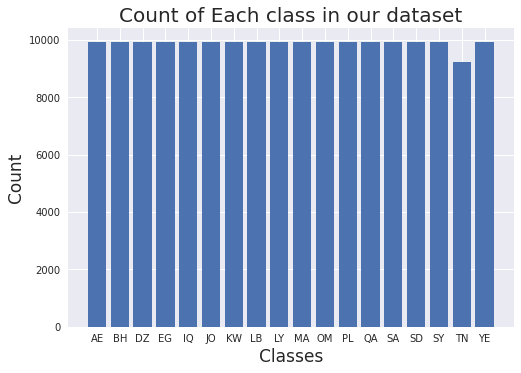

In [55]:
grouped_df = df.groupby(['dialect']).count().reset_index()
plt.style.use("seaborn")
plt.bar(grouped_df["dialect"],grouped_df["texts"])
plt.title("Count of Each class in our dataset",fontdict={"size":20})
plt.xlabel("Classes",fontdict={"size":17})
plt.ylabel("Count",fontdict={"size":17})

In [15]:
length_lst=[]
for i,row in df.iterrows():
    try:
        length_lst.append(len(row["texts"]))
    except:
        continue
print(f"the maximum text length is:{max(length_lst)}")

the maximum text length is:280


In [16]:
labels = df["dialect"]
vectorizer = TfidfVectorizer(max_features=7500, stop_words=stopwords.words('arabic'))
processed_features = vectorizer.fit_transform(df["texts"].astype("U").tolist())

In [17]:
X_train, X_test,y_train,y_test= train_test_split(processed_features, labels, test_size=0.2,shuffle=True)

In [18]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [19]:
encoder = LabelEncoder()
encoder.fit(labels)
labels=encoder.fit_transform(labels)

num_classes = int((len(set(labels))))
print((len(set(labels))))

y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

18


In [20]:
# y_train= tf.keras.utils.to_categorical(y_train,num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [21]:
X_train[0].shape

(7500,)

In [22]:
y_train[1]

12

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
mlnb = MultinomialNB()
mlnb_pred = mlnb.fit(X_train, y_train).predict(X_test)
print("Multionmial Navie Bayes Accuracy:",sklearn.metrics.accuracy_score(y_test, mlnb_pred))


#########################################################################################
# svc_clf =SVC(C=1,kernel="rbf",gamma=.2)
# svc_clf.fit(X_train, y_train)
# svc_predicted = svc_clf.predict(X_test)
#########################################################################################
# gb_clf = GradientBoostingClassifier(n_estimators=10)
# gb_clf.fit(X_train, y_train)
# gb_predicted = gb_clf.predict(X_test)
# print("gradient boosting Accuracy:  ",sklearn.metrics.accuracy_score(y_test, gb_predicted))
#########################################################################################
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10)
rf_clf.fit(X_train, y_train)
rf_predicted = rf_clf.predict(X_test)
print("random forest Accuracy:  ",sklearn.metrics.accuracy_score(y_test, rf_predicted))

Multionmial Navie Bayes Accuracy: 0.41029746355439456
random forest Accuracy:   0.24594814752394595


In [30]:
#####Import Note should be taken into you coonsideration 

'''AS appear here there is a significant overfitting althogh I have reduced the number of layers of my model 
I tried to use different architecture but still overfitting this due to:
###(the small amount of data that I used to be trained on it 178*.8=142 thousand row from actual size .8*458=336 thousand)

Why I do that using only 1/3 of data size:
1- you are thinking that I used 1/3 of my data to overcome imbalanced data problem but
2- I had to use 1/3 of the data due to meomry run out problem as:

-----------> If I increased the data up to the actual size 336 to be trained on, the session of notebook will be crashed 
due to meomry ram sapce 
-----------> if I increased the number of Features more than 7500 as appeard in tf-idf processing, the session of notebook will be crashed 
due to meomry ram sapce 

-- I tried to run this model on public colab 12.5 gb ram (not colab pro 25 gb ram) but it was failed due to same problem (ram space)
-- I tried to run this model on AWS Notebook instance Segamaker but it was failed due to same problem (ram space)
-- I ran it on Kaggle as you see in this notebook, It was finally trained in with 7500 Features and 142 thousand row 
maximum limit of data vloume and features number to get my model traind

'''
import pickle
pickle.dump(mlnb, open("mlnb.sav", 'wb'))
pickle.dump(rf_clf, open("rf_clf.sav", 'wb'))
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open('./rf_clf.sav', 'rb'))

In [32]:
#loaded_model.predict(X_test).shape

(35601,)

In [35]:
#print(confusion_matrix(y_test,mlnb_pred))
print(classification_report(y_test,mlnb_pred))


              precision    recall  f1-score   support

           0       0.31      0.29      0.30      1983
           1       0.26      0.24      0.25      1964
           2       0.42      0.47      0.45      1951
           3       0.52      0.71      0.60      1972
           4       0.49      0.52      0.50      1950
           5       0.25      0.28      0.26      1925
           6       0.34      0.32      0.33      2033
           7       0.49      0.56      0.52      1969
           8       0.52      0.44      0.48      2048
           9       0.60      0.61      0.61      2003
          10       0.28      0.29      0.29      1928
          11       0.35      0.34      0.34      2015
          12       0.34      0.36      0.35      2029
          13       0.28      0.30      0.29      1970
          14       0.59      0.57      0.58      1998
          15       0.43      0.35      0.38      2031
          16       0.59      0.45      0.51      1891
          17       0.31    

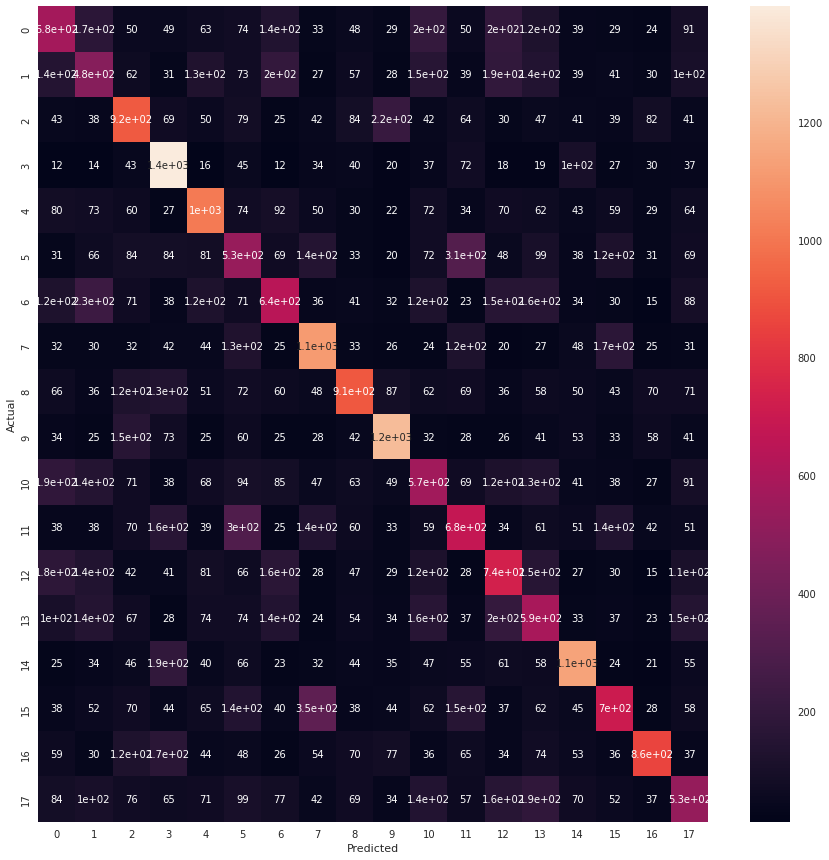

In [56]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
data = {'y_Actual':  y_test.tolist(),
        'y_Predicted': mlnb_pred.tolist()
        }

df1 = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df1['y_Actual'], df1['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [59]:
cc=mlnb.predict(features)
cc

array([ 2,  4,  6, 14, 12, 10,  6,  9, 15, 12,  9,  7,  5, 12, 16, 12,  2,
       16,  4, 14,  1, 12, 13,  2,  4])

In [60]:
features = vectorizer.transform(df["texts"][0:25].astype("U").tolist())
features=features.toarray()

cc=mlnb.predict(features)
xc = encoder.inverse_transform(cc)
    
l=df["dialect"][0:25].to_list()
for i in range(len(l)):
    print("the predicted label is", xc.reshape(-1,1)[i], "the true labels is" ,np.array(l).reshape(-1,1)[i])


the predicted label is ['DZ'] the true labels is ['MA']
the predicted label is ['IQ'] the true labels is ['IQ']
the predicted label is ['KW'] the true labels is ['QA']
the predicted label is ['SD'] the true labels is ['SD']
the predicted label is ['QA'] the true labels is ['SD']
the predicted label is ['OM'] the true labels is ['EG']
the predicted label is ['KW'] the true labels is ['IQ']
the predicted label is ['MA'] the true labels is ['MA']
the predicted label is ['SY'] the true labels is ['SY']
the predicted label is ['QA'] the true labels is ['QA']
the predicted label is ['MA'] the true labels is ['MA']
the predicted label is ['LB'] the true labels is ['LB']
the predicted label is ['JO'] the true labels is ['YE']
the predicted label is ['QA'] the true labels is ['QA']
the predicted label is ['TN'] the true labels is ['MA']
the predicted label is ['QA'] the true labels is ['QA']
the predicted label is ['DZ'] the true labels is ['DZ']
the predicted label is ['TN'] the true labels is